### Apriori Algorithm for Association Rule Mining

In [25]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [24]:
# !pip install mlxtend

In [26]:
df = pd.read_csv("datasets/apriori_dataset/retail_dataset.csv", sep=",")
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


Each row in dataset represents items that were purchased together on same day at same store.

looks like dataset contains NaN -> sparse dataset

In [38]:
# fill NaN with empty string
df = df.fillna(" ")

In [46]:
# checking unique items in all dataset
items = set()
for col in df:
    items.update(df[col].unique())

print(items, len(items))
items.remove(" ")
print(items, len(items))

{' ', 'Meat', 'Bagel', 'Eggs', 'Wine', 'Diaper', 'Milk', 'Cheese', 'Pencil', 'Bread'} 10
{'Meat', 'Bagel', 'Eggs', 'Wine', 'Diaper', 'Milk', 'Cheese', 'Pencil', 'Bread'} 9


Convert the dataset into one hot encoding (required for mlxtend library)

Using all unique items as base, take each row and elements that are in unique items but not in row are uncommon items ie. 0 and elements that are in both unique items and each row are common items ie. 1

In [59]:
itemset = set(items)
encoded_vals = []
for row in df.itertuples():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

print(encoded_vals[0])
encoded_df = pd.DataFrame(encoded_vals)

{'Bagel': 0, 'Milk': 0, 'Meat': 1, 'Diaper': 1, 'Eggs': 1, 'Wine': 1, 'Cheese': 1, 'Pencil': 1, 'Bread': 1}


Using Apriori module from mlxtend library

Implementation: 
`apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)`

df - one hot-encoded df
min_support - minimum support
use_colnames - preserve col names
max_len - max length of itemset generated, if "None", all possible lengths are evaluated
verbose - show num of iterations if >=1
low_memory - if True, use iterator to search for combinations above min_support




In [67]:
freq_items = apriori(encoded_df, min_support=0.2, use_colnames=True, verbose=1)
# support - It shows how many times the itemset appears in the transaction database
# showing support that are > min_support for each itemsets
freq_items.head()

Processing 135 combinations | Sampling itemset size 3


/Users/pinkysitikhu/.virtualenvs/nlp_env/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.476190,(Meat)
3,0.406349,(Diaper)
4,0.438095,(Eggs)


Association rules: Frequent if-then associations, antecedent (if), consequent (then)

`association_rules(df, metric=’confidence’, min_threshold=0.8, support_only=False)`

metric can be set to confidence, lift, support, leverage and conviction

confidence - defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents. The confidence value indicates how reliable is this rule.

In [63]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
# showing association rules with confidence metric: shows which items is frequently purchased with other item
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540


Visualize the results

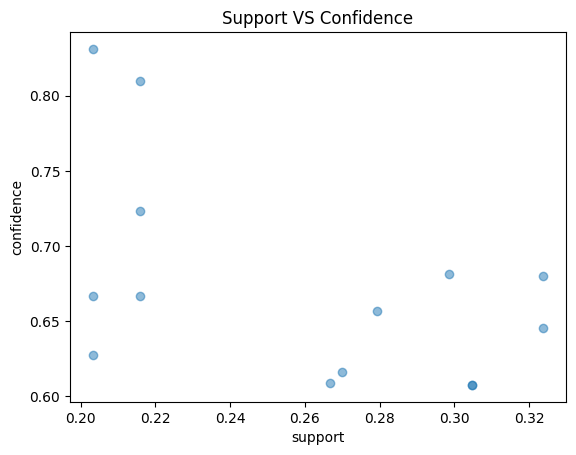

In [64]:
# support vs confidence
plt.scatter(rules["support"], rules["confidence"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("confidence")
plt.title("Support VS Confidence")
plt.show()

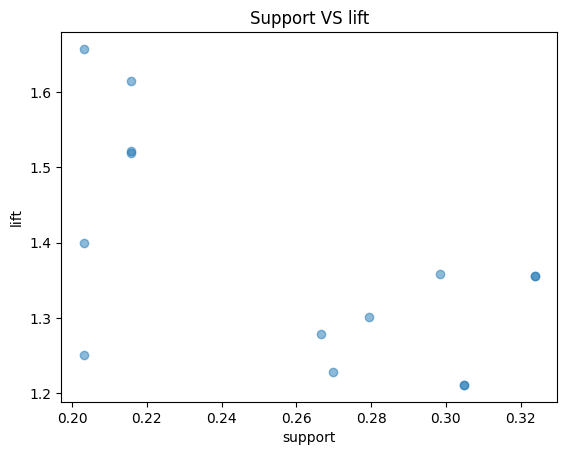

In [65]:
# Support VS Lift
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support VS lift")
plt.show()

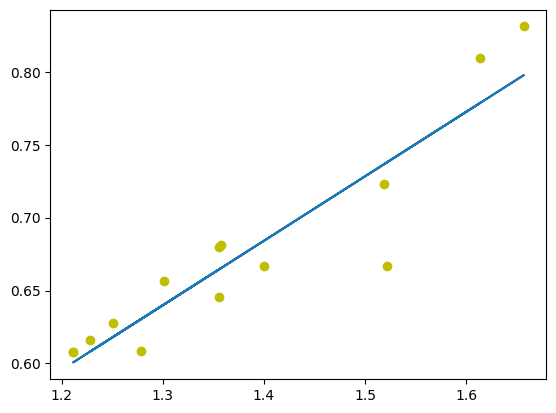

In [66]:
# lift vs confidence
fit = np.polyfit(rules["lift"], rules["confidence"], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules["lift"], rules["confidence"], "yo", rules["lift"], fit_fn(rules["lift"]))